# Assignment 4: Fraud Detection Using an Autoencoder and Variational Autoencoder


##### Group Members:
1. Kummitha Jhanavi (CS21BTECH11032)
2. Potta Vennela (CS21BTECH11046)
3. Vinjam Aswitha (MA21BTECH11018)
4. Pundi Bindusree (CS21BTECH11048)
5. K Vivek Kumar (CS21BTECH11026)

### Introduction

**Synthetic data generation** using **Variational Autoencoder (VAE)** involves training the VAE to encode input data into a lower-dimensional latent space and decode it back to the original data space. During training, the encoder maps input data to a probability distribution in the latent space, while the decoder reconstructs data points from samples drawn from this distribution. Once trained, sampling from the latent space allows for the generation of new data points resembling the original data, aiding tasks with limited data availability or augmenting datasets for machine learning models. This process encourages the latent space to follow a standard normal distribution, promoting the generation of diverse and realistic samples.

#### Description about the dataset

Attached is a Credit card dataset containing credit card transactions.

### Code Implementation

In [34]:
# Necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [31]:
# Loading the dataset
data = pd.read_csv('creditcard.csv')  
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

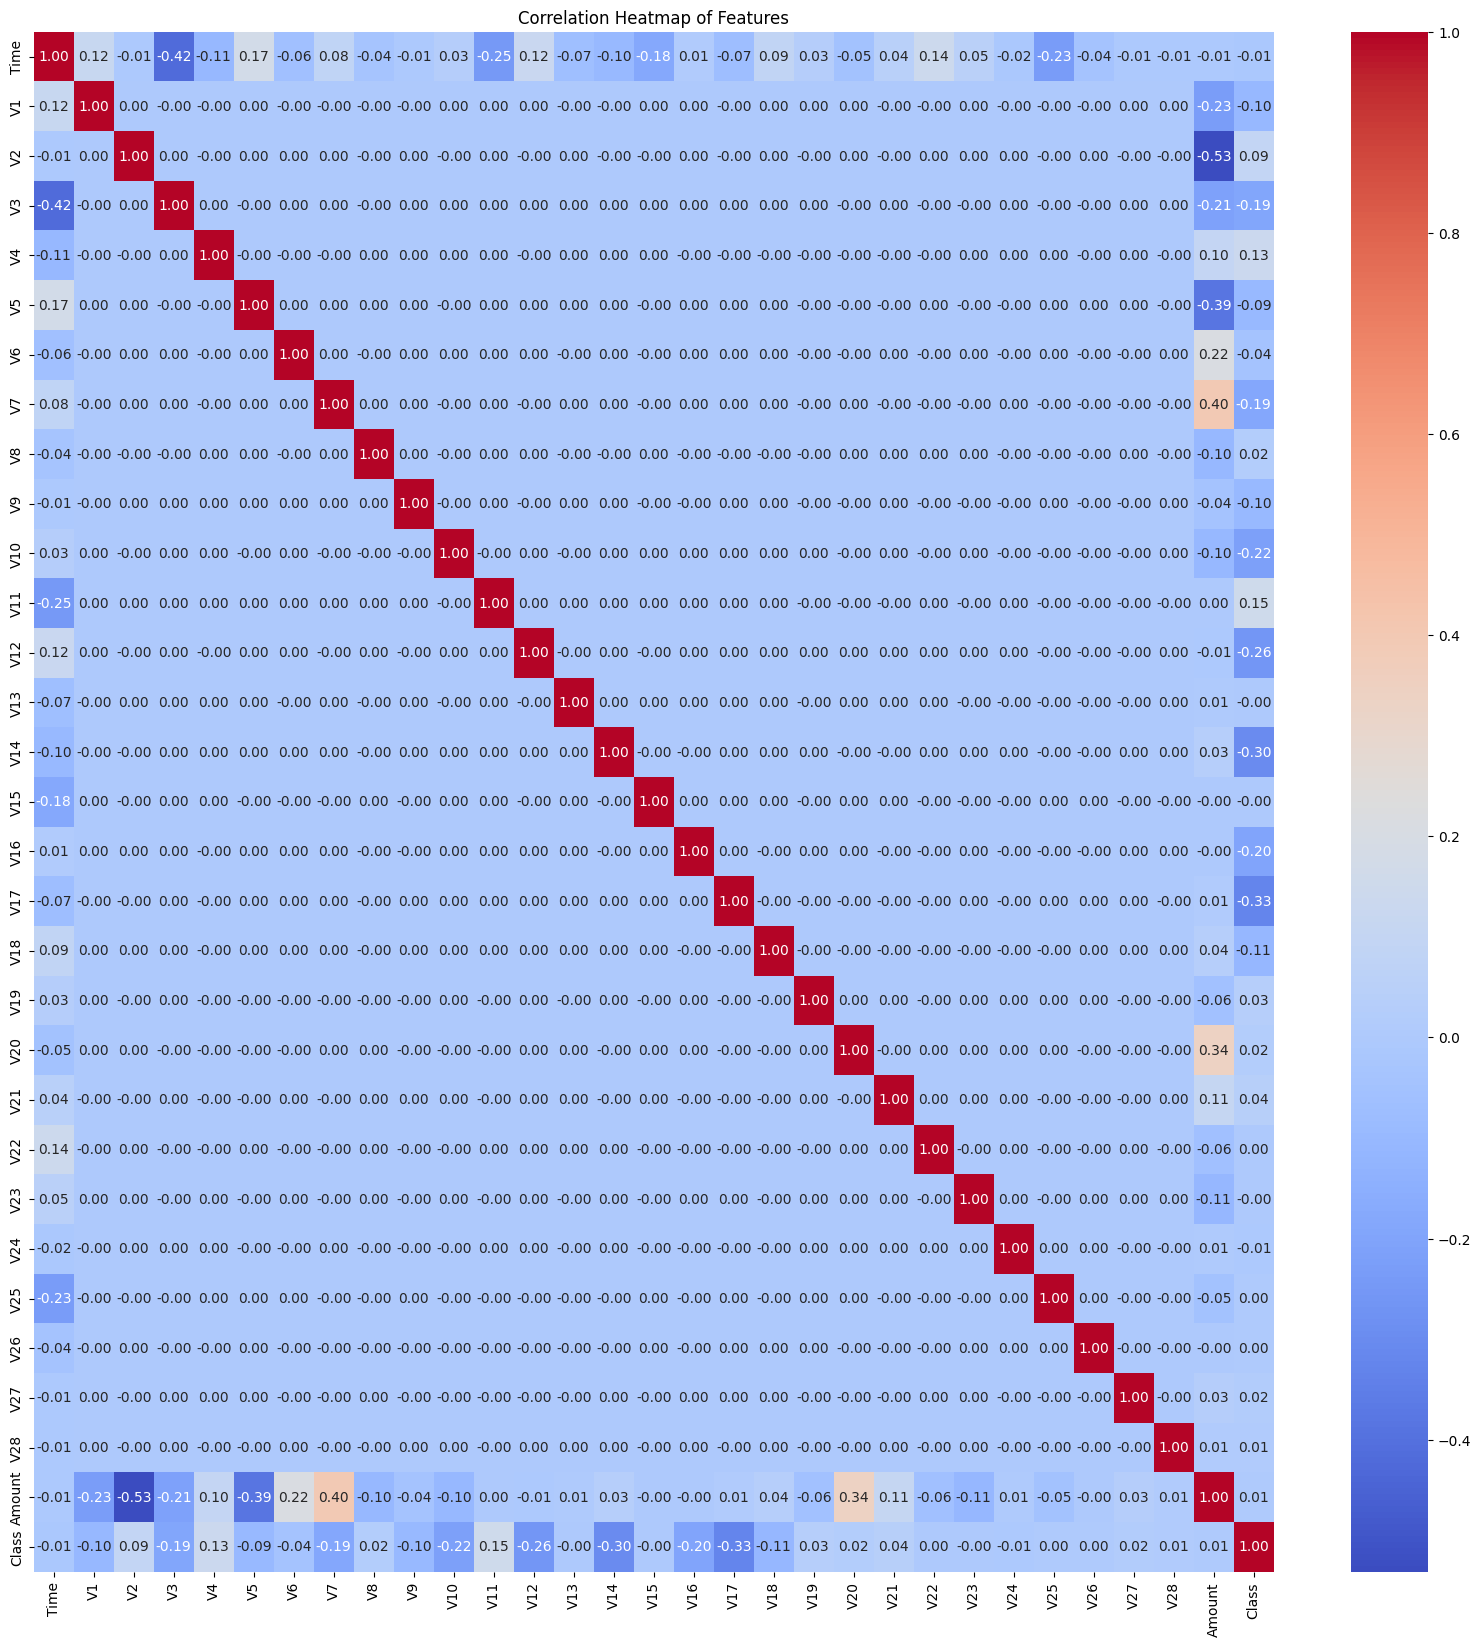

In [36]:
# Plotting a correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

From the above heatmap, we can observe that the columns V1, V2, ..., V28 are completely independent of each other and only effect the class and the amount columns

In [45]:
class_distribution = data['Class'].value_counts()

class_distribution

Class
0    284315
1       492
Name: count, dtype: int64

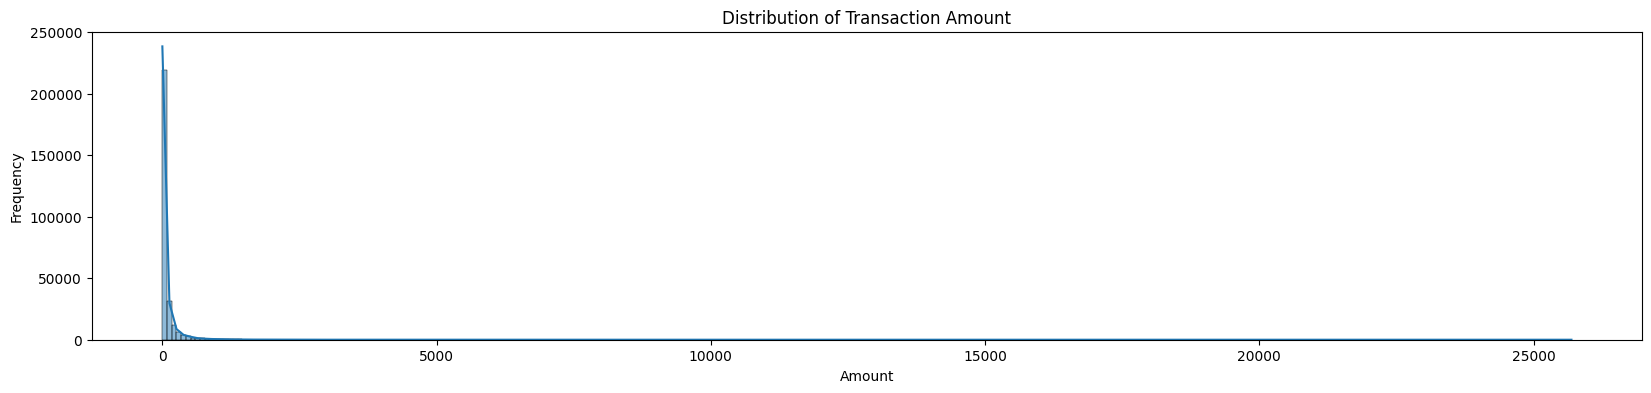

In [46]:
# Plot the distribution of 'Amount'
plt.figure(figsize=(20, 4))
sns.histplot(data['Amount'], bins=300, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

The above graph shows that lower amount of money have been transacted higher number of times than the higher amount of money.

In [27]:
# Convert time difference and amount features into log scale
data['Time'] = np.log1p(data['Time'])
data['Amount'] = np.log1p(data['Amount'])

In [28]:
# Split the data into features and labels
X = data.drop(['Class'], axis=1)
y = data['Class']

In [8]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Autoencoder architecture using Scikit-learn MLPRegressor
autoencoder = MLPRegressor(hidden_layer_sizes=(15,), activation='relu', solver='adam', max_iter=100, random_state=42)

In [11]:
# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled)

MLPRegressor(hidden_layer_sizes=(15,), max_iter=100, random_state=42)

In [12]:
# Use the autoencoder for fraud detection
decoded_X_test = autoencoder.predict(X_test_scaled)
mse = np.mean(np.power(X_test_scaled - decoded_X_test, 2), axis=1)
threshold = np.percentile(mse, 95)

In [13]:
# Classify transactions as normal or fraudulent using autoencoder
predictions = (mse > threshold).astype(int)

In [14]:
# Calculate prediction score and F1 score for autoencoder
prediction_score_autoencoder = accuracy_score(y_test, predictions)
f1_autoencoder = f1_score(y_test, predictions)

In [15]:
print(f"Prediction Score for Autoencoder: {prediction_score_autoencoder}")
print(f"F1 Score for Autoencoder: {f1_autoencoder}")

Prediction Score for Autoencoder: 0.9509673115410273
F1 Score for Autoencoder: 0.05225653206650831


The high prediction score (0.951) suggests effective classification of transactions, but the low F1 score (0.052) indicates challenges in accurately detecting fraudulent transactions, emphasizing the model's limitations in handling minority class instances.

In [47]:
class VariationalAutoencoder:
    def __init__(self, input_dim, latent_dim):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.encoder = MLPRegressor(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=10, random_state=42)
        self.decoder = MLPRegressor(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=10, random_state=42)
    
    def fit(self, X):
        self.encoder.fit(X, X)
        encoded_X = self.encoder.predict(X)
        self.decoder.fit(encoded_X, X)
    
    def predict(self, X):
        encoded_X = self.encoder.predict(X)
        decoded_X = self.decoder.predict(encoded_X)
        mse_vae = np.mean(np.power(X - decoded_X, 2), axis=1)
        return mse_vae

In [48]:
# Instantiate VAE
vae = VariationalAutoencoder(input_dim=X_train_scaled.shape[1], latent_dim=15)

In [49]:
# Train VAE
vae.fit(X_train_scaled)

In [50]:
# Use the VAE for fraud detection
mse_vae = vae.predict(X_test_scaled)
threshold_vae = np.percentile(mse_vae, 95) 

In [51]:
# Classify transactions using VAE as normal or fraudulent
predictions_vae = (mse_vae > threshold_vae).astype(int)

In [52]:
# Calculate prediction score and F1 score for VAE
prediction_score_vae = accuracy_score(y_test, predictions_vae)
f1_vae = f1_score(y_test, predictions_vae)

In [53]:
print(f"Prediction Score for Variational Autoencoder: {prediction_score_vae}")
print(f"F1 Score for Variational Autoencoder: {f1_vae}")

Prediction Score for Variational Autoencoder: 0.9511779783013237
F1 Score for Variational Autoencoder: 0.056328469630132334


The prediction score for the variational autoencoder (VAE) is notably similar to that of the autoencoder (AE), standing at 0.951. This suggests that both models achieve comparable overall accuracy in distinguishing fraudulent from non-fraudulent transactions within the dataset. However, similar to the AE, the F1 score for the VAE remains relatively low at 0.056. This indicates that, despite achieving high overall accuracy, the VAE struggles to effectively identify fraudulent transactions, particularly in terms of balancing precision and recall. Consequently, while the prediction score reflects strong performance, the low F1 score underscores potential limitations in the VAE's ability to accurately detect fraudulent activities, similar to the AE.